# SALES ANALYSIS

Importing Necessary Libraries

In [252]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
pd.options.mode.chained_assignment = None

### Merging the 12 mons of sales data into a single CSV file

In [ ]:

files = [file for file in os.listdir('/content/sales_data')]
all_months_data = pd.DataFrame()

for file in files:
  df = pd.read_csv("/content/sales_data/"+file)
  all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv')


Read in updated DataFrame

In [ ]:
all_data = pd.read_csv('all_data.csv', index_col=0)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


### Clean Up The Data!

Looking for Missing Data

In [ ]:
for col in all_data.columns:
  pct_missing = np.mean(all_data[col].isnull())
  print(f"{col} ---> {pct_missing*100}%")

Order ID ---> 0.29167781643029167%
Product ---> 0.29167781643029167%
Quantity Ordered ---> 0.29167781643029167%
Price Each ---> 0.29167781643029167%
Order Date ---> 0.29167781643029167%
Purchase Address ---> 0.29167781643029167%


In [ ]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
75,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN,NaN,NaN
1488,NaN,NaN,NaN,NaN,NaN,NaN
1517,NaN,NaN,NaN,NaN,NaN,NaN


Drop rows of NAN

In [ ]:
all_data = all_data.dropna(how='any')

In [ ]:
for col in all_data.columns:
  pct_missing = np.mean(all_data[col].isnull())
  print(f"{col} ---> {pct_missing*100}%")

Order ID ---> 0.0%
Product ---> 0.0%
Quantity Ordered ---> 0.0%
Price Each ---> 0.0%
Order Date ---> 0.0%
Purchase Address ---> 0.0%


Find 'Or' and delete it

In [ ]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1483,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1904,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2050,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2225,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3091,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

Converting Columns to the correct type

In [ ]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #Int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #Float

Converting the Order Date to the correct type

In [215]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

## Augmenting Data with Adding New Columns

Adding month column

In [ ]:
all_data['Month'] = all_data['Order Date'].str[0:2].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2


Adding a Sales column

In [205]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,Portland (ME),700.00
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2,San Francisco (CA),3.84
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2,New York City (NY),389.99
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2,Atlanta (GA),14.95
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2,Seattle (WA),7.68


Adding City Column

In [ ]:
def get_city(address):
  return address.split(',')[1]

In [ ]:
def get_state(address):
  return address.split(',')[2].split(' ')[1]

In [ ]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})" )
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,Portland (ME)
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2,San Francisco (CA)
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2,New York City (NY)
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2,Atlanta (GA)
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2,Seattle (WA)


## Analysing the Data

Best Month for Sales

In [237]:
results = all_data.groupby(('Month')).sum()

Plotting the Results (Month)

In [ ]:
import matplotlib.pyplot as plt

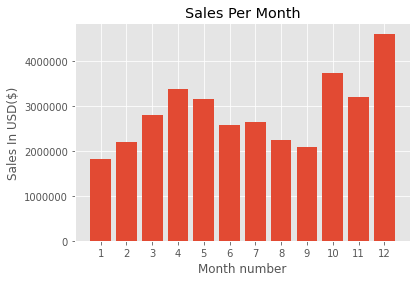

In [238]:
months = range(1, 13)
fig, ax = plt.subplots()
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.title('Sales Per Month')
plt.xlabel('Month number')
plt.ylabel('Sales In USD($)')
ax.set_yticklabels(['0','1000000', '2000000', '3000000', '4000000'])
plt.show()

City With the Best Sales

In [218]:
results = all_data.groupby(('City')).sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


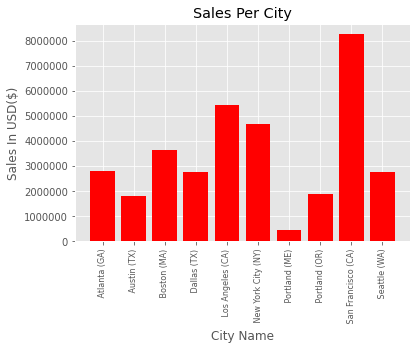

In [231]:
cities = [city for city, df in all_data.groupby('City')]

fig, ax = plt.subplots()
plt.bar(cities, results['Sales'], color='red')
plt.xticks(cities,rotation='vertical',size=8)
plt.title('Sales Per City')
plt.xlabel('City Name')
plt.ylabel('Sales In USD($)')
ax.set_yticklabels(['0','1000000', '2000000', '3000000', '4000000', '5000000', '6000000', '7000000','8000000'])
plt.show()

Best Time to display ADs to Maximize likelihood of customers' buying product

In [226]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,Portland (ME),700.00,1,35
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,San Francisco (CA),3.84,7,24
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,New York City (NY),389.99,9,46
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,Atlanta (GA),14.95,16,47
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,Seattle (WA),7.68,20,32


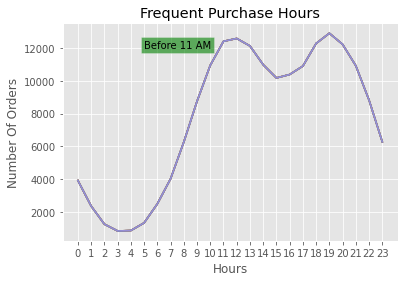

In [235]:
hours = [hour for hour, df in all_data.groupby('Hour')]
fig, ax = plt.subplots()
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid(True)
plt.title('Frequent Purchase Hours')
plt.xlabel('Hours')
plt.ylabel('Number Of Orders')
ax.text(5, 12000, 'Before 11 AM',fontsize = 10,bbox ={'facecolor':'green','alpha':0.6, 'pad':3})
plt.show()

# My Recommendation is around 11AM (11) or 7PM (19)

Products That Are Most Often Sold Together

In [ ]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [ ]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Grouped
16,150518,Macbook Pro Laptop,1,1700,02/26/19 12:38,"847 10th St, San Francisco, CA 94016",2,San Francisco (CA),"Macbook Pro Laptop,iPhone"
17,150518,iPhone,1,700,02/26/19 12:38,"847 10th St, San Francisco, CA 94016",2,San Francisco (CA),"Macbook Pro Laptop,iPhone"
82,150582,iPhone,1,700,02/16/19 23:38,"678 Maple St, Seattle, WA 98101",2,Seattle (WA),"iPhone,Lightning Charging Cable"
83,150582,Lightning Charging Cable,1,14.95,02/16/19 23:38,"678 Maple St, Seattle, WA 98101",2,Seattle (WA),"iPhone,Lightning Charging Cable"
91,150590,Apple Airpods Headphones,1,150,02/08/19 09:35,"196 River St, San Francisco, CA 94016",2,San Francisco (CA),"Apple Airpods Headphones,AAA Batteries (4-pack)"


In [ ]:
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
16,150518,"Macbook Pro Laptop,iPhone"
82,150582,"iPhone,Lightning Charging Cable"
91,150590,"Apple Airpods Headphones,AAA Batteries (4-pack)"
119,150617,"Google Phone,USB-C Charging Cable"
154,150651,"Google Phone,USB-C Charging Cable"


In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped']:
  row_list= row.split(',')
  count.update(Counter(combinations(row_list,2)))

for k, v in count.most_common(10):
  print(k , v)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


What Product Sold the Most & Why?

In [ ]:
product_group = all_data.groupby('Product')
product_group.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,Portland (ME)
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2,San Francisco (CA)
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2,New York City (NY)
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2,Atlanta (GA)
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2,Seattle (WA)
...,...,...,...,...,...,...,...,...
648,151121,LG Dryer,1,600.00,02/28/19 20:14,"550 North St, New York City, NY 10001",2,New York City (NY)
675,151147,Vareebadd Phone,1,400.00,02/01/19 11:04,"141 Maple St, Los Angeles, CA 90001",2,Los Angeles (CA)
704,151175,Vareebadd Phone,1,400.00,02/15/19 16:53,"530 Cherry St, Austin, TX 73301",2,Austin (TX)
804,151270,LG Washing Machine,1,600.00,02/20/19 15:29,"634 Walnut St, Dallas, TX 75001",2,Dallas (TX)


<Figure size 1440x1080 with 0 Axes>

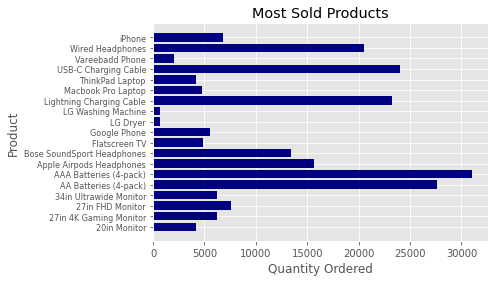

In [239]:
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]
plt.figure(figsize=(20,15))
fig, ax = plt.subplots()
plt.style.use('ggplot')
plt.barh(products, quantity_ordered, color='navy')
plt.yticks(products, size=8)
plt.xlabel('Quantity Ordered')
plt.title('Most Sold Products')
plt.ylabel('Product')
plt.show()

In [241]:
prices = all_data.groupby('Product').mean()['Price Each']


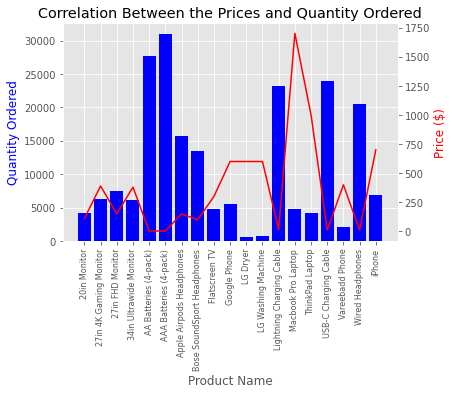

In [248]:
fig, ax1 = plt.subplots()
plt.title('Correlation Between the Prices and Quantity Ordered')
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='b')
ax2.plot(products, prices, color='r')
plt.grid(False)
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()